In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [3]:
filename = '/Users/gabrielm/Desktop/DATA-LASP/bsl_dmin.nc'

dataset = nc.Dataset(filename)

In [4]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source_of_Data: United States Geological Survey (USGS)
    Station_Name: Stennis Space Center
    IAGA_CODE: BSL
    Latitude: 30.3507
    Longitude: -89.6359
    Elevation: 8
    Sensor_Orientation: HDZF
    Digital_Sampling: 100.0 second
    Data_Interval_Type: filtered 1-minute (00:15-01:45)
    Data_Type: Definitive
    url: https://geomag.usgs.gov/monitoring/observatories/stennis
    file_conversion_author: Greg Lucas (glucas@usgs.gov)
    dimensions(sizes): Time(16149917)
    variables(dimensions): int64 Time(Time), float64 X(Time), float64 Y(Time), float64 Z(Time)
    groups: 


In [5]:
print(dataset.__dict__)

{'Source_of_Data': 'United States Geological Survey (USGS)', 'Station_Name': 'Stennis Space Center', 'IAGA_CODE': 'BSL', 'Latitude': 30.3507, 'Longitude': -89.6359, 'Elevation': 8, 'Sensor_Orientation': 'HDZF', 'Digital_Sampling': '100.0 second', 'Data_Interval_Type': 'filtered 1-minute (00:15-01:45)', 'Data_Type': 'Definitive', 'url': 'https://geomag.usgs.gov/monitoring/observatories/stennis', 'file_conversion_author': 'Greg Lucas (glucas@usgs.gov)'}


In [6]:
for dim in dataset.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 16149917


In [7]:
for var in dataset.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int64 Time(Time)
    units: minutes since 1986-04-18 18:43:00
    calendar: proleptic_gregorian
unlimited dimensions: Time
current shape = (16149917,)
filling on, default _FillValue of -9223372036854775806 used
<class 'netCDF4._netCDF4.Variable'>
float64 X(Time)
    _FillValue: nan
    description: X-component (Geographic North) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (16149917,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Y(Time)
    _FillValue: nan
    description: Y-component (Geographic East) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (16149917,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Z(Time)
    _FillValue: nan
    description: Z-component (Geographic Down [-r]) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (16149917,)
filling on


In [8]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)


In [9]:
x = df['X']

x = x[~np.isnan(x)]

df.dropna()

,Time,X,Y,Z
40501,1986-05-16 21:44:00,24512.503263,1078.097505,44443.0
40502,1986-05-16 21:45:00,24512.072279,1078.792957,44443.0
40503,1986-05-16 21:46:00,24511.772569,1078.779767,44443.1
40504,1986-05-16 21:47:00,24511.241662,1079.470787,44443.1
40510,1986-05-16 21:53:00,24510.211221,1080.139763,44443.7
...,...,...,...,...
16149912,2016-12-31 23:55:00,23904.100000,-400.800000,41048.2
16149913,2016-12-31 23:56:00,23904.600000,-400.900000,41048.2
16149914,2016-12-31 23:57:00,23905.100000,-400.600000,41048.2
16149915,2016-12-31 23:58:00,23905.700000,-400.800000,41048.3


In [10]:
df.head(40510)

## Looks like there are several NaN in this data set

,Time,X,Y,Z
0,1986-04-18 18:43:00,NaN,NaN,44447.1
1,1986-04-18 18:44:00,NaN,NaN,NaN
2,1986-04-18 18:45:00,NaN,NaN,44447.3
3,1986-04-18 18:46:00,NaN,NaN,44447.1
4,1986-04-18 18:47:00,NaN,NaN,44447.1
...,...,...,...,...
40505,1986-05-16 21:48:00,24510.742146,1079.448788,NaN
40506,1986-05-16 21:49:00,24510.773536,1078.735799,NaN
40507,1986-05-16 21:50:00,24510.973342,1078.744592,NaN
40508,1986-05-16 21:51:00,24510.642243,1079.444388,NaN


In [11]:
df.tail(10)

,Time,X,Y,Z
16149907,2016-12-31 23:50:00,23906.2,-402.3,41048.8
16149908,2016-12-31 23:51:00,23905.8,-402.1,41048.7
16149909,2016-12-31 23:52:00,23905.4,-401.7,41048.6
16149910,2016-12-31 23:53:00,23904.7,-401.4,41048.5
16149911,2016-12-31 23:54:00,23904.4,-401.3,41048.3
16149912,2016-12-31 23:55:00,23904.1,-400.8,41048.2
16149913,2016-12-31 23:56:00,23904.6,-400.9,41048.2
16149914,2016-12-31 23:57:00,23905.1,-400.6,41048.2
16149915,2016-12-31 23:58:00,23905.7,-400.8,41048.3
16149916,2016-12-31 23:59:00,23905.9,-401.0,41048.3


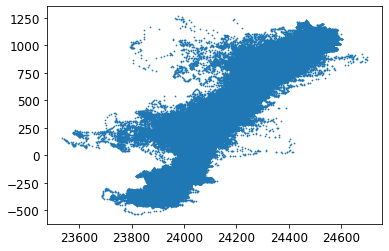

In [12]:
fig, ax = plt.subplots()

ax.scatter(df['X'], df['Y'], s=.5)


 

Text(0, 0.5, 'X-component of magnetic field')

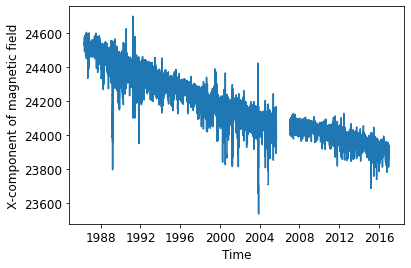

In [40]:
plt.plot(df['Time'], df['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

In [13]:
df['Time_Diff'] = df['Time'].diff()

In [14]:
df['Time_Diff'].max()

Timedelta('0 days 00:01:00')

In [15]:
# Print the number of nans in each column
for col in df.columns.to_list():
    print(col, df[col].isna().sum())


Time 0
X 1761581
Y 1761581
Z 1690144
Time_Diff 1


In [30]:
df_2016 = df[df['Time'] < pd.Timestamp(2016, 12, 31)]
inds_2016 = list(pd.isnull(df_2016['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_2016 = len(inds_2016) # number of NaNs in the X component
print(inds_len_2016)

1761581


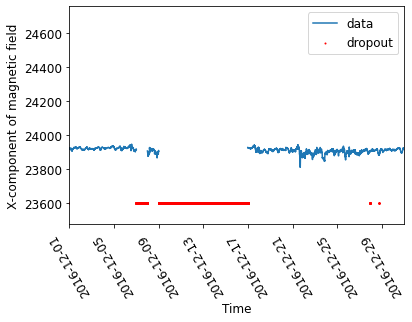

In [37]:
# Plot the 2016 data
plt.plot(df_2016['Time'], df_2016['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# This just puts a green dot anywhere there is a data dropout. 
# The y-value 23600 is just so it displays at the bottom.
plt.scatter(df_2016['Time'][inds_2016], [23600]*inds_len_2016, color='red', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(2016, 12, 1), datetime.date(2016, 12, 31)])
plt.xticks(rotation=120)
plt.legend()


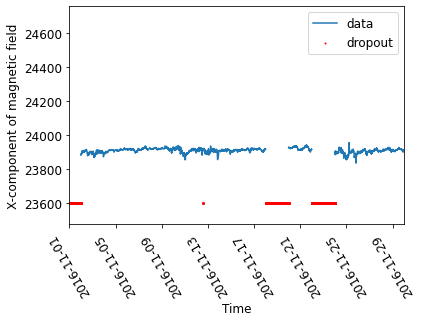

In [39]:
plt.plot(df_2016['Time'], df_2016['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# This just puts a green dot anywhere there is a data dropout. 
# The y-value 23600 is just so it displays at the bottom.
plt.scatter(df_2016['Time'][inds_2016], [23600]*inds_len_2016, color='red', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(2016, 11, 1), datetime.date(2016, 11, 30)])
plt.xticks(rotation=120)
plt.legend()